In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,353.799988,355.489990,345.890015,349.589996,349.589996,3835100
1,2017-09-06,349.500000,350.980011,341.559998,344.529999,344.529999,4091400
2,2017-09-07,345.980011,352.480011,343.450012,350.609985,350.609985,4239200
3,2017-09-08,348.989990,349.779999,342.299988,343.399994,343.399994,3263500
4,2017-09-11,351.350006,363.709991,350.000000,363.690002,363.690002,7667100


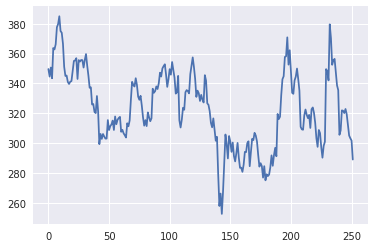

In [3]:
plt.plot(tesla.Close)
plt.show()

In [4]:
signal = np.copy(tesla.Close.values)

In [5]:
def john_ehlers(signal, alpha, option='normal'):
    buffer = np.copy(signal[:3]).tolist()
    trigger = np.copy(signal[:3]).tolist()
    for i in range(3,len(signal)):
        buffer.append((alpha-(alpha*alpha)/4)*signal[i] \
        + (0.5*(alpha*alpha)*signal[i-1]) \
        - (alpha - 0.75*(alpha*alpha)) * signal[i-2] \
        + 2*(1-alpha)*signal[i-1]
        - (1-alpha)*(1-alpha)*signal[i-2])
        trigger.append(2*buffer[i]-buffer[i-2])
    if option == 'trigger':
        return trigger
    else:
        return buffer

In [6]:
john = john_ehlers(signal, 0.7)

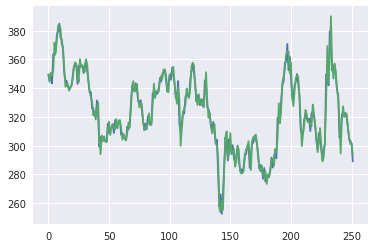

In [7]:
plt.plot(np.arange(len(tesla.Close)), tesla.Close)
plt.plot(np.arange(len(tesla.Close)), john)
plt.show()